In [22]:
!pip install requests python-dotenv pillow numpy

In [23]:
img_dict = {}

for i in range(0, 255):
    img_dict[i] = []

In [24]:
import requests
from dotenv import load_dotenv
import os

load_dotenv()
res = requests.get(
    url=os.environ.get("GIPHY_URL"),
    params={
        "api_key": os.environ.get("GIPHY_API_KEY")
    }
)

res

<Response [200]>

In [25]:
image_url = res.json()['data']['images']['original']['url']

In [26]:
print('image_url : ', image_url)

image_url :  https://media4.giphy.com/media/xUNd9WfYEbADMhVN4Y/giphy.gif?cid=80e5c503rckq6rx7556i8rv0s04twdhzl09waz4i78e7rzuz&ep=v1_gifs_random&rid=giphy.gif&ct=g


In [27]:
res = requests.get(url=image_url)

In [28]:
res.headers

{'Connection': 'keep-alive', 'Content-Length': '6047446', 'Last-Modified': 'Thu, 09 Nov 2017 23:35:02 GMT', 'ETag': '"6adb4d935da42e22447488919caddb64"', 'x-amz-storage-class': 'INTELLIGENT_TIERING', 'Content-Type': 'image/gif', 'access-control-allow-origin': '*', 'cross-origin-resource-policy': 'cross-origin', 'Accept-Ranges': 'bytes', 'Age': '3822', 'Date': 'Tue, 13 Aug 2024 00:17:50 GMT', 'X-Served-By': 'cache-iad-kcgs7200045-IAD, cache-mad22045-MAD', 'X-Cache': 'HIT, HIT', 'X-Cache-Hits': '1, 0', 'X-Timer': 'S1723508271.913801,VS0,VE1', 'Strict-Transport-Security': 'max-age=15465600', 'cache-control': 'max-age=86400', 'x-robots-tag': 'noai, noimageai'}

In [29]:
from io import BytesIO

In [30]:
image_data = BytesIO(res.content)

In [31]:
import PIL.Image
import PIL.ImageChops

image = PIL.Image.open(image_data).convert('L')

In [32]:
import PIL.ImageStat

i = PIL.ImageStat.Stat(image)
int((PIL.ImageStat.Stat(image)).mean[0])

47

In [33]:
avg_color = int(i.mean[0])

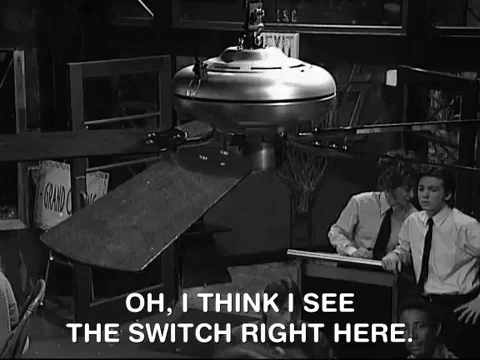

In [34]:
image

In [35]:
img_dict[avg_color].append(image_url)

## create dirs if not exist

In [36]:
# for i in range(0, 255):
#     path = f"./bdd/{i}"
#     os.makedirs(path, exist_ok=True)

# Load an image and resize

In [37]:
image = PIL.Image.open("./images/moicassou.jpg")

In [38]:
gray_image = image.convert("L")

In [46]:
import PIL.Image

width, height = gray_image.size 
new_w = width // 100
new_h = height // 100
resized_img = gray_image.resize([new_w, new_h], resample=PIL.Image.BILINEAR)

In [47]:
resized_img

In [48]:
import numpy as np
gray_image_arr = np.asarray(resized_img)

In [49]:
gray_image_arr.shape

(13, 10)

In [50]:
# remplir tous les pixels par des images de GIF de taille définie
from src.constants import TAILLE_DALLE

output_arr = np.zeros((TAILLE_DALLE * new_w, TAILLE_DALLE * new_h))
print("new_w", new_w)
print("new_h : ", new_h)
print('dims : ', output_arr.shape)

new_w 10
new_h :  13
dims :  (100, 130)


In [51]:
def load_img_from_url(url):
    res = requests.get(url=url, timeout=5)
    image_data = BytesIO(res.content)
    image = PIL.Image.open(image_data).convert("L")
    return image

In [61]:
import json
from tqdm import tqdm

with open("./image_bdd.json", 'r') as input:
    dict_url = json.load(input)
    for i in tqdm(range(new_w), desc="Processing rows"):
        for j in tqdm(range(new_w), desc="Processing columns", leave=False):
            value = gray_image_arr[i, j]
            if len(dict_url[str(gray_image_arr[i, j])]) > 0:
                # il existe une image
                # remplacer la nouvelle image par celle-ci
                # prendre une image au pif
                index = np.random.randint(len(dict_url[str(gray_image_arr[i,j])]))
                # remplacer les pixels
                image = load_img_from_url(dict_url[str(gray_image_arr[i, j])][index]).resize((TAILLE_DALLE,  TAILLE_DALLE))
                print(image)
                print("i : ", i)
                print("j : ", j)
                output_arr[i*TAILLE_DALLE:(i+1)*TAILLE_DALLE, j*TAILLE_DALLE:(j+1)*TAILLE_DALLE] = image
            else:
                output_arr[i*TAILLE_DALLE:(i+1)*TAILLE_DALLE, j*TAILLE_DALLE:(j+1)*TAILLE_DALLE] = 0
print("output_arr : ", output_arr)

Processing rows:   0%|          | 0/10 [00:00<?, ?it/s]

<PIL.Image.Image image mode=L size=10x10 at 0x27D8F49C500>
i :  0
j :  1


<PIL.Image.Image image mode=L size=10x10 at 0x27D8EB71D60>
i :  0
j :  2
<PIL.Image.Image image mode=L size=10x10 at 0x27D8EDF4D40>
i :  0
j :  4


Processing rows:  10%|█         | 1/10 [00:01<00:09,  1.04s/it]

<PIL.Image.Image image mode=L size=10x10 at 0x27D88225400>
i :  0
j :  8
<PIL.Image.Image image mode=L size=10x10 at 0x27D8EDF4D40>
i :  0
j :  9


<PIL.Image.Image image mode=L size=10x10 at 0x27D88467620>
i :  1
j :  0
<PIL.Image.Image image mode=L size=10x10 at 0x27D8EDF4D40>
i :  1
j :  1


<PIL.Image.Image image mode=L size=10x10 at 0x27D88225400>
i :  1
j :  2
<PIL.Image.Image image mode=L size=10x10 at 0x27D88A7E180>
i :  1
j :  5


Processing rows:  20%|██        | 2/10 [00:02<00:11,  1.40s/it]

<PIL.Image.Image image mode=L size=10x10 at 0x27D88225400>
i :  1
j :  7


Processing rows:  30%|███       | 3/10 [00:03<00:06,  1.09it/s]

<PIL.Image.Image image mode=L size=10x10 at 0x27D88467620>
i :  2
j :  8
<PIL.Image.Image image mode=L size=10x10 at 0x27D88225400>
i :  2
j :  9


<PIL.Image.Image image mode=L size=10x10 at 0x27D8EC679B0>
i :  3
j :  0


<PIL.Image.Image image mode=L size=10x10 at 0x27D88225400>
i :  3
j :  4


Processing rows:  40%|████      | 4/10 [00:03<00:04,  1.38it/s]

<PIL.Image.Image image mode=L size=10x10 at 0x27D8F49C200>
i :  3
j :  8


<PIL.Image.Image image mode=L size=10x10 at 0x27D8ED51EE0>
i :  4
j :  0


<PIL.Image.Image image mode=L size=10x10 at 0x27D8EDF4D40>
i :  4
j :  2
<PIL.Image.Image image mode=L size=10x10 at 0x27D8ECF7B00>
i :  4
j :  3


<PIL.Image.Image image mode=L size=10x10 at 0x27D8ED23260>
i :  4
j :  5


Processing rows:  50%|█████     | 5/10 [00:04<00:03,  1.44it/s]

<PIL.Image.Image image mode=L size=10x10 at 0x27D8EDF4D40>
i :  4
j :  6


Processing rows:  60%|██████    | 6/10 [00:04<00:02,  1.63it/s]

<PIL.Image.Image image mode=L size=10x10 at 0x27D8846CB90>
i :  5
j :  0
<PIL.Image.Image image mode=L size=10x10 at 0x27D88225400>
i :  5
j :  3
<PIL.Image.Image image mode=L size=10x10 at 0x27D8ED51EE0>
i :  5
j :  5


<PIL.Image.Image image mode=L size=10x10 at 0x27D8846CB90>
i :  6
j :  0
<PIL.Image.Image image mode=L size=10x10 at 0x27D8EC679B0>
i :  6
j :  1
<PIL.Image.Image image mode=L size=10x10 at 0x27D88A7E180>
i :  6
j :  3


Processing rows:  70%|███████   | 7/10 [00:04<00:01,  1.87it/s]

<PIL.Image.Image image mode=L size=10x10 at 0x27D8EDCD790>
i :  6
j :  6


Processing rows:  80%|████████  | 8/10 [00:05<00:00,  2.49it/s]

<PIL.Image.Image image mode=L size=10x10 at 0x27D88225400>
i :  7
j :  2


<PIL.Image.Image image mode=L size=10x10 at 0x27D8EC679B0>
i :  8
j :  0


<PIL.Image.Image image mode=L size=10x10 at 0x27D88225400>
i :  8
j :  2
<PIL.Image.Image image mode=L size=10x10 at 0x27D8ECF77A0>
i :  8
j :  6


Processing rows:  90%|█████████ | 9/10 [00:05<00:00,  2.69it/s]   

<PIL.Image.Image image mode=L size=10x10 at 0x27D8EDF5B80>
i :  9
j :  0


<PIL.Image.Image image mode=L size=10x10 at 0x27D8ECF7B30>
i :  9
j :  2
<PIL.Image.Image image mode=L size=10x10 at 0x27D8EDF5B80>
i :  9
j :  5
<PIL.Image.Image image mode=L size=10x10 at 0x27D88225400>
i :  9
j :  6


<PIL.Image.Image image mode=L size=10x10 at 0x27D8846C800>
i :  9
j :  7


Processing rows: 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]

<PIL.Image.Image image mode=L size=10x10 at 0x27D8ECF7E90>
i :  9
j :  9
output_arr :  

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [ 73.  81. 116. ...   0.   0.   0.]
 [ 82. 117. 136. ...   0.   0.   0.]
 [ 89. 156. 191. ...   0.   0.   0.]]


In [64]:
img_output = PIL.Image.fromarray(output_arr)

In [66]:
img_output.show()